## 2-7. 연관성 분석


### import

In [3]:
import pandas as pd
import numpy as np
import scipy

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

for i in [pd, np, scipy, mpl, sns]:
    print(i.__name__, i.__version__)

pandas 0.25.1
numpy 1.18.5
scipy 1.5.2
matplotlib 3.5.3
seaborn 0.12.2


### 1 연관성 분석

#### 변수 간의 연관성을 분석하기 위한 방법

| 변수 | | | 구분 | 분석 방법 |
|------|----------|----------|------|-----------|
| 수치형 | 이진범주형 | | 모수적 | • t-검정<br>• Paired t-검정 |
| | | | 비모수적 | • Mann-Whitney U<br>• Wilcoxon 부호 순위 검정 |
| | 수치형 | | 모수적 | Pearson 상관도 |
| | | | 비모수적 | • Spearman 상관도<br>• Kendall 계수 |
| | 범주형 | | 모수적 | 일원 분산분석 |
| | | | 비모수적 | Kruskal-Wallis |
| | 범주형1, 범주형2 교호항 | | 모수적 | 이원 분산분석 |
| 범주형 | 범주형 | | 비모수적 | 카이제곱 독립성 검정 |

### 2. 모수적 vs 비모수적 검정 방법

#### 모수적 검정 방법
- 데이터가 특정 분포(보통 정규분포)를 따른다고 가정
- 모수(평균, 분산, …)에 대해 검정

#### 비모수적 검정 방법
- 순위나 빈도 정보 활용
- 데이터가 특정 분포를 따른다는 가정 없음

- 특징
|   | 장점 | 단점 |
| --- | --- | --- |
| 모수적 검정 방법 | 검정력이 높고 정확도가 우수 | 가정이 틀리면 결과 왜곡 가능 |
| 비모수적 검정 방법 | 유연하고 이상치에 강함 | 검정력이 상대적으로 낮을 수 있음 |

### 3. 정규성 검정
#### 검정 내용
- $H_0$: 정규분포를 따름
- $H_1$: 정규분포를 따르지 않음

▷ 정규성을 가정하고 있는 방법에서 유효성을 확인하기 위해 사용


#### Shapiro-Wilk

- 소표본에 높은 정밀도를 보이는 검정법
- $𝑛\le50 \text{(n: 표본수)}$일 때 많이 사용

정렬된 표본: $x_{(1)} \leq x_{(2)} \leq \cdots x_{(n)}$

$W = \frac{\left(\sum_{i=1}^{n} a_i x_{(i)}\right)^2}{\sum_{i=1}^{n}(x_i - \bar{x})^2}$

$a_i$: 정규분포 분위수 기반으로 계산된 가중치 계수

▷ W가 클수록 정규분포에 가까움

#### Jarque Bera

- 왜도(Skewness)는 0, 첨도(Kurtosis)는 3 에서 벗어날수록 정규성이 약해지는 성질 이용
> $𝐽𝐵=\frac{𝑛}{6}\left(𝑆^2+\frac(𝐾−3)^2{4}\right) \sim \chi^2(2)$, 우측 꼬리 검정
- 계산이 간단
- 다수의 표본에서 안정적 성능(> 2000)

#### Kolmogorov Smirnov

- 표본의 누적분포함수(ECDF)와 비교 대상의 누적분포함수의 차이 이용
$𝐷=𝑠𝑢𝑝_{𝑥}[𝐹_𝑛(𝑥)−𝐹(𝑥)]$

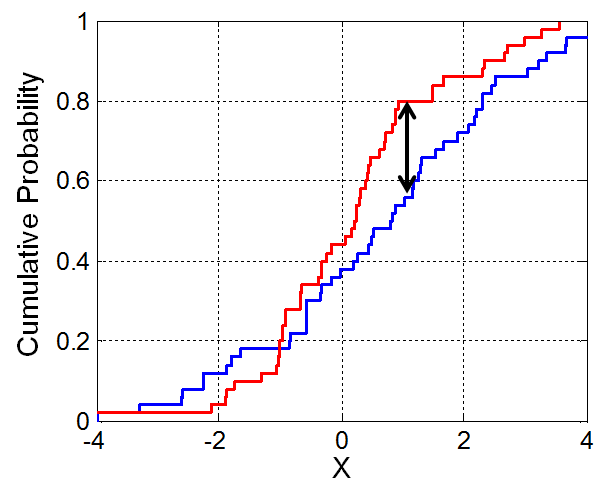


### 4. 등분산 검정

#### Bartlett 검정
- $H_0$: 전체 모집단의 분산이 같음
- $H_1$: 전체 모집단의 분산이 같지는 않음

> 두 개 이상의 모집단의 등분산성 검정
> 
> 모든 모집단이 정규분포를 따른다고 가정
> 
> 비모수 검정: Levene

- 검정통계량

$B = \frac{\sum_{i=1}^{k}(n_i - 1)\ln(\bar{s}^2/s_i^2)}{1 + \frac{1}{3(k-1)}\left(\sum_{i=1}^{k}\frac{1}{n_i-1} - \frac{1}{N-k}\right)} \sim \chi^2(k-1)$

$\bar{s}^2 = \frac{\sum_{i=1}^{k}(n_i-1)s_i^2}{\sum_{i=1}^{k}(n_i-1)}$

$k$: 집단의 수

$N$: 전체 표본의 수

$n_i$: $i$집단의 표본의 수

- 우측 꼬리 검정


### 5.Mann-Whitney U

- 두 모집단 간의 분포의 위치(중앙값)에 대한 검정
> $H_0$: 두 집단의 분포에 차이가 없음

- 특징
> 비모수적 검정 방법
> 
> 두 집단 간의 값들의 경향성 분석

- 검정 통계량

> $U_1 = R_1 - \frac{m(m+1)}{2} \quad U_2 = R_2 - \frac{n(n+1)}{2}$
>
> $R_1$: 집단 1의 순위합 $\qquad$ $R_2$: 집단 2의 순위합
>
> $m$: 집단 1의 표본수 $\qquad$ $n$: 집단 2의 표본수
>
> $U = \min(U_1, U_2)$

U는 표본수가 커짐에 따라 정규분포에 수렴

소표본에서는 보다 강인한 permutation test를,  
대표본에서는 정규분포를 사용

$Z = \frac{U - \frac{mn}{2}}{\sqrt{\frac{mn(m+n+1)}{12}}}$

### 6. Wilcoxon 부호 순위 검정
- 대응 관계의 두 모집단간의 분포의 위치(중앙값)에 대한 검정
> $H_0$: 대응 관계의 두 집단의 분포(또는 중앙값)에 차이가 없음
- 특징
> 비모수적 검정 방법
> 
> 두 집단 간의 값들의 경향성 분석
- 검정 통계량

> $d_i = x_i - y_i$
>
>$d_i = 0$인 항목은 제외하고, $|d_i|$를 기준으로 순위 부여
>
> 원래 부호(+/-)에 따라 순위 따라
>
> $W^+$: 양의 부호 순위합  
> $W^-$: 음의 부호 순위합
>
> ▷ $W = \min(W^+, W^-)$
>
> W는 표본수가 커짐에 따라 정규분포에 수렴
>
> 소표본에서는 보다 강인한 permutation test,  
> 대표본에서는 정규분포를 사용
>
> $Z = \frac{U - \frac{n(n+1)}{4}}{\sqrt{\frac{n(n+1)(2n+1)}{24}}}$

### 7. 상관도 분석

#### 분석 내용
- 두 변수 X,Y 간의 관계가 어느 방향(+ 또는 -)으로 함께 변화하는지를 수치로 표현
> 주의: 상관 관계 ≠ 인과 관계
- 상관 관계의 유무를 가설 검정을 통해 도출

$𝐻_0: 𝑟=0$

$𝐻1: 𝑟\ne0$


#### 피어슨(Pearson) 상관도 분석

- 특징
> 이상치에 민감
> 비선형 관계를 포착하지 못함
- 상관도
$r = \frac{\sum_{i=1}^{n}(x_i - \overline{X})(y_i - \overline{Y})}{\sqrt{\sum_{i=1}^{n}(x_i - \overline{X})^2 \sum_{i=1}^{n}(y_i - \overline{Y})^2}}$

- 가설 검정
> 가정: X, Y 는 이변량 정규분포를 따름
- 검정통계량
$t = \frac{r\sqrt{n-2}}{\sqrt{1-r^2}} \sim t(n-2)$

#### 스피어만(Spearman) 상관도 분석

- 특징
> 피어슨 상관도에 비해 이상치에 덜 민감
> 비선형 관계라도 단조 관계는 포착 가능
- 상관도

> $𝑟_𝑠=𝑃𝑒𝑎𝑟𝑠𝑜𝑛(𝑅𝑋,𝑅𝑌)$
>
> $𝑅_𝑋, 𝑅_𝑌$: X와 Y의 순위
> 
> 동점 순위가 없다면: $r_s = 1 - \frac{6\sum_{i=1}^{n}d_i^2}{n(n^2-1)}$

- 가설 검정

> $t = \frac{r_s\sqrt{n-2}}{\sqrt{1-r_s^2}} \sim t(n-2)$
>
> 통계량은 근사화한 결과이므로, 소표본에서는 보다 강인한 permuation test 와 같은 방법을 사용

#### 켄달의 순위 상관계수

- 특징
> 스피어만보다 이상치에 더 강건, 작은 데이터에서도 안정적
> 
> 큰 데이터에서 느림: 시간 복잡도: $O(n^2)$
- 상관도: 모든 가능한 두 변수의 대소 비교 결과를 통해 도출

  경우의 수: $\binom{n}{2} = \frac{1}{2}n(n-1)$

  C: 일치(Concordant)한 경우의 수
  D: 불일치(Discordant)한 경우의 수

- 가설 검정: $\tau \sim N\left(0, \frac{2(2n+5)}{9n(n-1)}\right)$
> 근사적 정규분포:소표본에서는 보다 강인한 permuation test 와 같은 방법을 사용


### 8. 분산분석

- 분석 내용: 셋 이상의 모집단의 모평균의 차이를 검정

> $H_0: \mu_1 = \mu_2 = \cdots = \mu_k$ (모든 집단의 평균은 같음)
>
> $H_1: \mu_1 \neq \mu_2\ or\ \mu_1 \neq \mu_3\ or\ ...\ or\ \mu_{k-1} \neq \mu_k$ (적어도 하나의 집단의 평균은 다름)
>
> → 집단의 구분 기준: **범주형 변수**

- 가정

> 각각의 모집단의 분산은 같음
> 
> 각각의 모집단은 정규분포를 따름

- 검정통계량

> $F = \frac{MSR}{MSE} = \frac{SSR/(k-1)}{SSE/(n-k)}$
> 
> $k$: 집단의 수 , $n$: 표본의 수
>
> ▷ 정규방정식으로 추정된 **선형 회귀 모델**과 대응되는 개념

**[Ex.1]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px">

단일 요인에 대한 분산분석입니다.

데이터셋을 만들어봅니다. df_ind: factor별 평균이 값은 데이터셋, df_dep: factor별 평균이 다른 데이터 셋입니다.
    
df_
    
</div>

In [8]:
from scipy.stats import norm
import matplotlib.lines as mlines

In [9]:
mu = {'A': 0.3, 'B': 0.3, 'C': 0.3}
sig = 0.2
n = {'A': 30, 'B': 25, 'C': 35}

df_ind = pd.concat([
    pd.DataFrame(norm.rvs(loc=mu[i], scale=sig, size=n[i], random_state=123), columns=['X']).assign(factor=i)
    for i in ['A', 'B', 'C']
], axis=0)

mu = {'A': 0.3, 'B': 0.5, 'C': 0.7}
sig = 0.2
n = {'A': 30, 'B': 25, 'C': 35}

df_dep = pd.concat([
    pd.DataFrame(norm.rvs(loc=mu[i], scale=sig, size=n[i], random_state=123), columns=['X']).assign(factor=i)
    for i in ['A', 'B', 'C']
], axis=0)

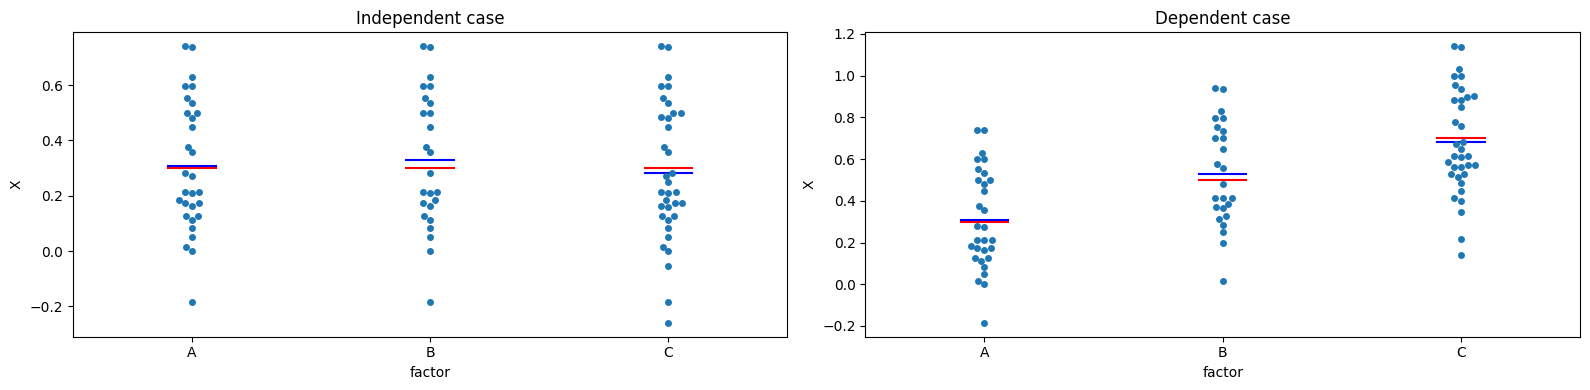

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
axes[0].set_title('Independent case')
sns.swarmplot(data=df_ind, x='factor', y='X', ax=axes[0])
for i, c in enumerate(['A', 'B', 'C']):
    x_bar = df_ind.loc[df_ind['factor'] == c, 'X'].mean()
    axes[0].add_line(mlines.Line2D([-0.1 + i, 0.1 + i], [0.3, 0.3], c='r'))
    axes[0].add_line(mlines.Line2D([-0.1 + i, 0.1 + i], [x_bar, x_bar], c='b'))

axes[1].set_title('Dependent case')
sns.swarmplot(data=df_dep, x='factor', y='X', ax=axes[1])
for i, c in enumerate(['A', 'B', 'C']):
    x_bar = df_dep.loc[df_dep['factor'] == c, 'X'].mean()
    axes[1].add_line(mlines.Line2D([-0.1 + i, 0.1 + i], [0.3 + 0.2 * i, 0.3 + 0.2 * i], c='r'))
    axes[1].add_line(mlines.Line2D([-0.1 + i, 0.1 + i], [x_bar, x_bar], c='b'))

plt.tight_layout()
plt.show()

#### 정규방정식과 분산분석

$𝑦_{𝑖𝑗}=𝑎_𝑗+𝑒_{𝑖𝑗}$
> $y_{ij}$: 범주 j에 속한 i번째 관측값
> $a_j$: 범주 j의 예측값

$SSE = \sum_{j=1}^{g}\sum_{i=1}^{n_j}(y_{ij} - a_j)^2$

$SSR = \sum_{j=1}^{g}\sum_{i=1}^{n_j}(a_j - \bar{y})^2 = \sum_{j=1}^{g}n_j(a_j - \bar{y})^2$

$SST = SSR + SSE$

▷ 그룹별 종속변수의 평균으로 예측하는 것  = 정규방정식으로 추정된 선형 회귀 모델로 예측하는 것

$\frac{\partial SSE}{\partial a_j} = \sum_{i=1}^{n_j}-2(y_{ij} - a_j) = 0$

$a_j = \frac{\sum_{i=1}^{n_j}y_{ij}}{n_j}$


#### 선형회귀모델의 유의미성 검정
- $𝐻_0:𝛽_1=𝛽_2=…=𝛽_𝑝=0$ (선형회귀모델은 무의미) → 모든 집단의 평균은 같음
- $𝐻_1:𝛽_1≠0 𝑜𝑟 𝛽_2≠0 𝑜𝑟…𝛽_𝑝≠0$ (선형회귀모델은 유의미) → 적어도 하나의 집단의 평균은 다름

$F = \frac{MSR}{MSE} = \frac{SSR/(k-1)}{SSE/(n-k)}$

- k: 집단의 수, n: 표본의 수

####  분산 분석의 비모수 검정법: Kruskal-Wallis



#### 이원분산분석

- 상호작용(교호작용)

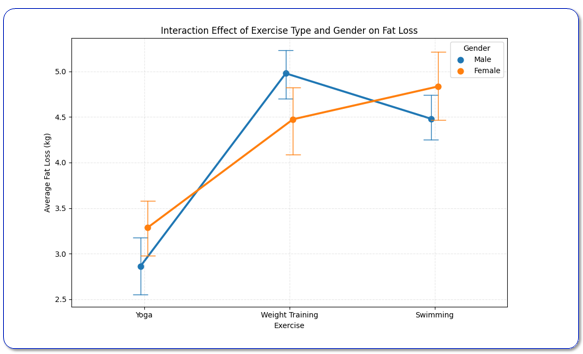

#### 이원분산분석
- 두 개의 범주형 변수와 상호작용(교호)항의 선형회귀모델과 대응

$𝑆𝑆𝑇=𝑆𝑆𝑅+𝑆𝑆𝐸$

$𝑆𝑆𝑅=𝑆𝑆𝐴+𝑆𝑆𝐵+𝑆𝑆𝐴𝐵$

> $SSA = \sum_{j=1}^{g_a} na_j(a_j - \bar{y})^2$
>
> $SSB = \sum_{j=1}^{g_b} nb_j(b_j - \bar{y})^2$
>
> $\bar{y}_{ij} = \bar{y} + a_i - \bar{y} + b_j - \bar{y} = a_i + b_j - \bar{y}$
>
> $SSAB = \sum_{i=1}^{g_a}\sum_{j=1}^{g_b} nab_{ij}(ab_{ij} - \bar{y}_{ij})^2$

#### 이원 분산 분석 테이블

| 요인 | 제곱합 | 자유도 | 평균제곱 | F |
|------|--------|--------|----------|---|
| A | $SSA = \sum_{j=1}^{g_a} na_j(a_j - \bar{y})^2$ | $g_a - 1$ | $MSA = \frac{SSA}{g_a - 1}$ | $\frac{MSA}{MSE}$ |
| B | $SSB = \sum_{j=1}^{g_b} nb_j(b_j - \bar{y})^2$ | $g_b - 1$ | $MSB = \frac{SSB}{g_b - 1}$ | $\frac{MSB}{MSE}$ |
| A×B | $SSAB = \sum_{i=1}^{g_a}\sum_{j=1}^{g_b} nab_{ij}(ab_{ij} - \bar{y}_{ij})^2$ | $(g_a - 1)(g_b - 1)$ | $MSAB = \frac{SSAB}{(g_a - 1)(g_b - 1)}$ | $\frac{MSAB}{MSE}$ |
| 오차(Error) | $SSE$ | $N - g_a g_b$ | $MSE = \frac{SSE}{N - g_a g_b}$ | |
| 전체(Total) | $SST$ | $N - 1$ | | |

### 9. 카이제곱 검정

#### 검정 방법
- 관측 빈도와 기대 빈도의 차이를 통한 검정
- 검정통계량
> $\chi^2 = \sum_{i} \frac{(O_i - E_i)^2}{E_i} \sim \chi^2(df)$, 우측 꼬리 검정
- 검정의 내용과 관점에 따라 크게 3 가지로 구분
> 적합도(Goodness-of-Fit) 검정
> 
> 독립성(Independence) 검정
> 
> 동질성(Homogeneity) 검정



#### 적합도(Goodness-of-Fit) 검정

- $H_0: P(X = 1) = p_1, P(X = 2) = p_2, ... P(X = k) = p_k$ (모집단은 이론적 분포를 따름)

- $H_1: P(X = 1) \neq p_1\ or\ P(X = 2) \neq p_2, ... P(X = k) \neq p_k$ (모집단은 이론적 분포에 따르지 않음)

| 변수값$(i)$ | 1 | 2 | ... | k |
|------------|---|---|-----|---|
| 이론적 확률($P(X = i)$) | $p_1$ | $p_2$ | ... | $p_k$ |

- 검정통계량 계산

| 변수값$(i)$ | 1 | 2 | ... | k |
|------------|---|---|-----|---|
| 관측빈도(X = i)  | $O_1$ | $O_2$ | ... | $O_k$ |

$O_𝑖$: 변수값 i가 관측된 빈도, $𝐸_𝑖=𝑁𝑝𝑖$: 변수값 i의 기대 빈도

$\chi^2=\sum_{𝑖=1}^𝑘\frac{(𝑂_𝑖−𝐸_𝑖)^2}{𝐸_𝑖} \sim \chi^2(𝑘−1)$

### 카이제곱 검정

- 독립성(Independence) 검정
> $H_0$: 두 변수는 독립 $𝐻_0:𝑃(𝐴_𝑖\cap𝐵_𝑗)=𝑃(𝐴_𝑖)𝑃(𝐵_𝑗)$
> 
> $H_1$: 두 변수는 독립이 아님 $𝐻_0:𝑃(𝐴_𝑖\cap𝐵_𝑗)\neq𝑃(𝐴_𝑖)𝑃(𝐵_𝑗)$


- 검정통계량 계산

$\chi^2 = \sum_{i=1}^{m} \sum_{j=1}^{n} \frac{(O_{ij} - E_{ij})^2}{E_{ij}} \sim \chi^2 \big( (m - 1)(n - 1) \big)$


#### 관측 빈도수 테이블

|   | $A_1$ | $A_2$ | … | $A_n$ | 행 합계 |
| --- | --- | --- | --- | --- | --- |
| $B_1$ |   |   | … |   | $N_1$ |
| $B_2$ |   |   | … |   | $N_2$ |
| … | … | … | … | … | … |
| $B_m$ |   |   | … |   | $N_m$ |
| 열합계 | $M_1$ | $M_2$ | … | $M_m$ |   |

▷ 행합계, 열합계: 기대 빈도 계산에서 활용

#### 기대 빈도수 테이블

$E_{ij}=\frac{N_i}{N}\frac{M_j}{N}N=\frac{N_i}{M_j}{N}$

▷ 관측빈도수 테이블에서 구한 두 변수에서 빈도수

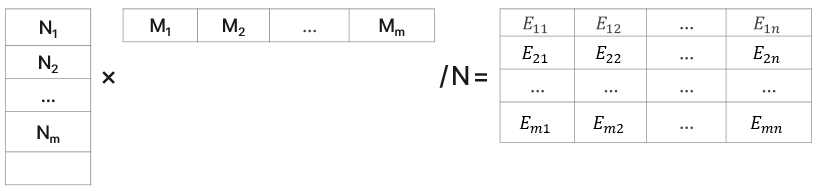

#### 동질성(Homogeneity) 검정

- 해석의 맥락이 다를 뿐, 방식은 독립성 검정과 같음
> $H_0$: 두 변수는 다른 분포에서 나왔음
> 
> $H_1$: 두 변수는 동일 분포에서 나왔음
